In [9]:
###UNCOMMENT AND MOUNT DRIVE FOR MULTISESSION USE AND SAVING###

# from google.colab import drive
# drive.mount('/content/drive')


In [10]:
# 1. Clone if needed + bootstrap
import sys
from pathlib import Path


REPO_URL = "https://github.com/somaSystems/HyperThelia.git"
CLONE_PARENT_DIR = Path("/content")
CLONE_DIR = CLONE_PARENT_DIR / "HyperThelia"
BASE_PROJECT_DIR = CLONE_DIR / "Hyperthelia_project"
LIB_DIR = BASE_PROJECT_DIR / "notebooks" / "lib"

if not CLONE_DIR.exists():
    print("Cloning HyperThelia repo...")
    !git clone {REPO_URL} {CLONE_DIR}
else:
    print("HyperThelia repo already exists.")

if str(LIB_DIR) not in sys.path:
    sys.path.insert(0, str(LIB_DIR))

# 2. Now safe to import functions
from setup_functions import clone_hyperthelia_repo, setup_project_io

# 3. Use functions
CLONE_DIR, BASE_PROJECT_DIR = clone_hyperthelia_repo(CLONE_PARENT_DIR)


HyperThelia repo already exists.
Repo already exists at: /content/HyperThelia
BASE_PROJECT_DIR is set to: /content/HyperThelia/Hyperthelia_project


In [11]:
from pathlib import Path

# === BASE PROJECT SETUP ===
BASE_PROJECT_DIR = Path("/content/HyperThelia/Hyperthelia_project")
RAW_DIR = Path("/content/HyperThelia/Hyperthelia_project/data_demo")



In [12]:
# Install latest Cellpose from GitHub (includes SAM support)
!pip install git+https://github.com/mouseland/cellpose.git

  Cloning https://github.com/mouseland/cellpose.git to /tmp/pip-req-build-9ovcgc4m
  Running command git clone --filter=blob:none --quiet https://github.com/mouseland/cellpose.git /tmp/pip-req-build-9ovcgc4m
  Resolved https://github.com/mouseland/cellpose.git to commit df6b944673c3ab6d46c2cb780bcde040970dbebc
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [13]:
# # === SESSION SETUP IMPORTS AND FUNCTIONS ===
import segmentation
import importlib
importlib.reload(segmentation)

RAW_DIR, OUTPUTS_DIR = setup_project_io(BASE_PROJECT_DIR)

# SETUP LOGGER, CHECK GPU, and CELLPOSE MODEL

from segmentation import setup_cellpose_model
model = setup_cellpose_model(gpu=True)




Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.7.dev7+gdf6b944 
platform:       	linux 
python version: 	3.11.13 
torch version:  	2.6.0+cu124! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


Project outputs will be saved to: /content/HyperThelia/Hyperthelia_project/outputs
Looking for raw experiment folders in: /content/HyperThelia/Hyperthelia_project/data_demo
creating new log file
2025-07-25 20:44:40,580 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log
2025-07-25 20:44:40,581 [INFO] 
cellpose version: 	4.0.7.dev7+gdf6b944 
platform:       	linux 
python version: 	3.11.13 
torch version:  	2.6.0+cu124
2025-07-25 20:44:40,819 [INFO] ** TORCH CUDA version installed and working. **
✅ Cellpose model initialised (SAM backend)
2025-07-25 20:44:40,820 [INFO] ** TORCH CUDA version installed and working. **
2025-07-25 20:44:40,821 [INFO] >>>> using GPU (CUDA)
2025-07-2

100%|██████████| 1.15G/1.15G [00:04<00:00, 267MB/s]


In [14]:
from cellpose import models, core, io

io.logger_setup()  # Enables progress printing

# Check if GPU is available
if not core.use_gpu():
    raise ImportError("No GPU access. Change your Colab runtime to GPU.")

# Load Cellpose model (SAM backend)
model = models.CellposeModel(gpu=True)

2025-07-25 20:44:49,410 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log
2025-07-25 20:44:49,411 [INFO] 
cellpose version: 	4.0.7.dev7+gdf6b944 
platform:       	linux 
python version: 	3.11.13 
torch version:  	2.6.0+cu124
2025-07-25 20:44:49,412 [INFO] ** TORCH CUDA version installed and working. **
2025-07-25 20:44:49,413 [INFO] ** TORCH CUDA version installed and working. **
2025-07-25 20:44:49,413 [INFO] >>>> using GPU (CUDA)
2025-07-25 20:44:51,910 [INFO] >>>> loading model /root/.cellpose/models/cpsam


In [15]:
# === LOOK FOR EXPERIMENTS IN RAW_DIR ===
from segmentation import print_experiment_summary
print_experiment_summary(RAW_DIR)



 Scanning raw data directory: /content/HyperThelia/Hyperthelia_project/data_demo
🧪 Found 6 TIFF(s) in demothelia:
    demothelia_5.tif
    demothelia_1.tif
    demothelia_2.tif
    demothelia_4.tif
    demothelia_6.tif
    demothelia_3.tif
 Found 1 experiment folder(s) to process.
  1. demothelia: 6 TIFF(s)
     Shape: (30, 225, 225)


In [16]:
from segmentation import run_segmentation_pipeline

# === SEGMENTATION PARAMETERS ===
Z_AXIS = 0
CHANNEL_AXIS = 1
BATCH_SIZE = 32
DO_3D = False
STITCH_THRESHOLD = 0.5

# === RUN PIPELINE ===
run_segmentation_pipeline(
    RAW_DIR,
    OUTPUTS_DIR,
    model,
    z_axis=Z_AXIS,
    channel_axis=CHANNEL_AXIS,
    batch_size=BATCH_SIZE,
    do_3D=DO_3D,
    stitch_threshold=STITCH_THRESHOLD
)



 Scanning raw data directory: /content/HyperThelia/Hyperthelia_project/data_demo
🧪 Found 6 TIFF(s) in demothelia:
    demothelia_5.tif
    demothelia_1.tif
    demothelia_2.tif
    demothelia_4.tif
    demothelia_6.tif
    demothelia_3.tif

 Starting segmentation for experiment: demothelia (6 TIFFs)
 Will now segment 6 TIFF file(s)...
 Segmenting: demothelia_1.tif
2025-07-25 20:44:53,908 [INFO] 100%|##########| 1/1 [00:01<00:00,  1.06s/it]
2025-07-25 20:44:53,909 [INFO] network run in 1.06s
2025-07-25 20:44:53,953 [INFO] 0%|          | 0/30 [00:00<?, ?it/s]
2025-07-25 20:44:56,136 [INFO] No cell pixels found.
2025-07-25 20:44:56,138 [INFO] No cell pixels found.
2025-07-25 20:44:56,139 [INFO] 100%|##########| 30/30 [00:02<00:00, 13.73it/s]
2025-07-25 20:44:56,139 [INFO] stitching 30 planes using stitch_threshold=0.500 to make 3D masks


100%|██████████| 29/29 [00:00<00:00, 478.33it/s]

2025-07-25 20:44:56,226 [INFO] masks created in 2.27s
 Saved: segmented_demothelia_1.pkl to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_pickles
 Saved TIFF: segmented_demothelia_1.tif to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Segmenting: demothelia_2.tif


2025-07-25 20:44:56,853 [INFO] 100%|##########| 1/1 [00:00<00:00,  2.08it/s]
2025-07-25 20:44:56,854 [INFO] network run in 0.48s
2025-07-25 20:44:56,878 [INFO] 0%|          | 0/30 [00:00<?, ?it/s]
2025-07-25 20:44:56,879 [INFO] No cell pixels found.
2025-07-25 20:44:58,466 [INFO] No cell pixels found.
2025-07-25 20:44:58,467 [INFO] 100%|##########| 30/30 [00:01<00:00, 18.89it/s]
2025-07-25 20:44:58,467 [INFO] stitching 30 planes using stitch_threshold=0.500 to make 3D masks


100%|██████████| 29/29 [00:00<00:00, 589.72it/s]

2025-07-25 20:44:58,543 [INFO] masks created in 1.67s
 Saved: segmented_demothelia_2.pkl to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_pickles
 Saved TIFF: segmented_demothelia_2.tif to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Segmenting: demothelia_3.tif


2025-07-25 20:44:59,144 [INFO] 100%|##########| 1/1 [00:00<00:00,  2.17it/s]
2025-07-25 20:44:59,145 [INFO] network run in 0.46s
2025-07-25 20:44:59,168 [INFO] 0%|          | 0/30 [00:00<?, ?it/s]
2025-07-25 20:45:00,664 [WARNING] no seeds found in get_masks_torch - no masks found.
2025-07-25 20:45:00,817 [INFO] 100%|##########| 30/30 [00:01<00:00, 18.21it/s]
2025-07-25 20:45:00,818 [INFO] stitching 30 planes using stitch_threshold=0.500 to make 3D masks


100%|██████████| 29/29 [00:00<00:00, 581.73it/s]

2025-07-25 20:45:00,892 [INFO] masks created in 1.72s
 Saved: segmented_demothelia_3.pkl to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_pickles
 Saved TIFF: segmented_demothelia_3.tif to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Segmenting: demothelia_4.tif


2025-07-25 20:45:01,516 [INFO] 100%|##########| 1/1 [00:00<00:00,  2.14it/s]
2025-07-25 20:45:01,517 [INFO] network run in 0.47s
2025-07-25 20:45:03,229 [INFO] 100%|##########| 30/30 [00:01<00:00, 17.78it/s]
2025-07-25 20:45:03,230 [INFO] stitching 30 planes using stitch_threshold=0.500 to make 3D masks


100%|██████████| 29/29 [00:00<00:00, 581.18it/s]

2025-07-25 20:45:03,304 [INFO] masks created in 1.76s
 Saved: segmented_demothelia_4.pkl to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_pickles
 Saved TIFF: segmented_demothelia_4.tif to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Segmenting: demothelia_5.tif


2025-07-25 20:45:03,935 [INFO] 100%|##########| 1/1 [00:00<00:00,  2.15it/s]
2025-07-25 20:45:03,936 [INFO] network run in 0.47s
2025-07-25 20:45:03,959 [INFO] 0%|          | 0/30 [00:00<?, ?it/s]
2025-07-25 20:45:03,960 [INFO] No cell pixels found.
2025-07-25 20:45:05,659 [INFO] 100%|##########| 30/30 [00:01<00:00, 17.65it/s]
2025-07-25 20:45:05,660 [INFO] stitching 30 planes using stitch_threshold=0.500 to make 3D masks


100%|██████████| 29/29 [00:00<00:00, 602.82it/s]

2025-07-25 20:45:05,733 [INFO] masks created in 1.77s
 Saved: segmented_demothelia_5.pkl to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_pickles
 Saved TIFF: segmented_demothelia_5.tif to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Segmenting: demothelia_6.tif


2025-07-25 20:45:06,354 [INFO] 100%|##########| 1/1 [00:00<00:00,  2.16it/s]
2025-07-25 20:45:06,355 [INFO] network run in 0.47s
2025-07-25 20:45:08,099 [INFO] 100%|##########| 30/30 [00:01<00:00, 17.44it/s]
2025-07-25 20:45:08,100 [INFO] stitching 30 planes using stitch_threshold=0.500 to make 3D masks


100%|██████████| 29/29 [00:00<00:00, 574.50it/s]

2025-07-25 20:45:08,175 [INFO] masks created in 1.80s
 Saved: segmented_demothelia_6.pkl to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_pickles
 Saved TIFF: segmented_demothelia_6.tif to /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs


In [17]:
from measurevisualise import interactive_segmentation_viewer
interactive_segmentation_viewer(BASE_PROJECT_DIR / "outputs")


2025-07-25 20:45:08,409 [INFO] NumExpr defaulting to 12 threads.


Output()

PART II TRACKING

In [18]:
import tracking
import propagation
import visualisation

import importlib
# importlib.reload(tracking)
# importlib.reload(propagation)
# importlib.reload(visualisation)

 visualisation.py loaded with functions:


In [19]:
# === AUTO CONFIGURATION ===

# Tracking parameters (editable by user)
XY_UM = 0.325
Z_UM = 1.0
MAX_DIST_UM = 10
MIN_VOLUME = 200
MAX_VOLUME = 8000
EDGE_MARGIN = 1
TRACKING_MODE = "nearest"

 Looking for segmented TIFFs in: /content/HyperThelia/Hyperthelia_project/outputs

 Checking: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Found 6 TIFF(s) in /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Timepoint log saved to: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/timepoint_log.txt

 Plotting volumes for experiment: demothelia (6 TIFFs)


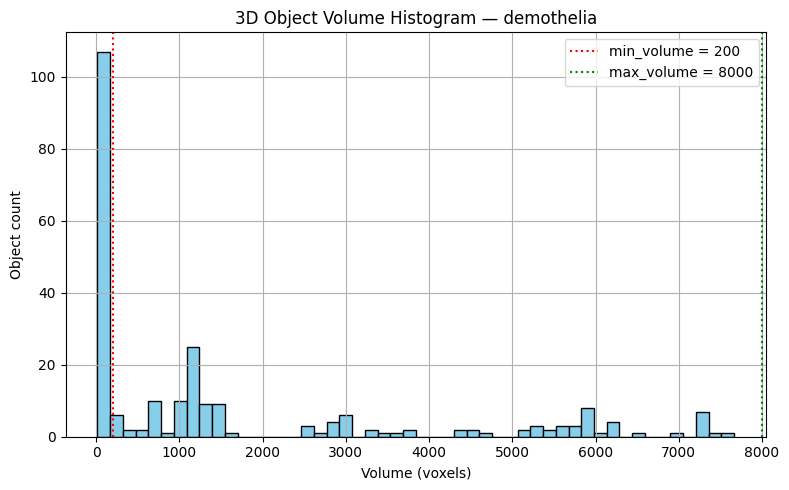


🩻 Viewing experiment: demothelia, timepoint 0, Z-slice 18


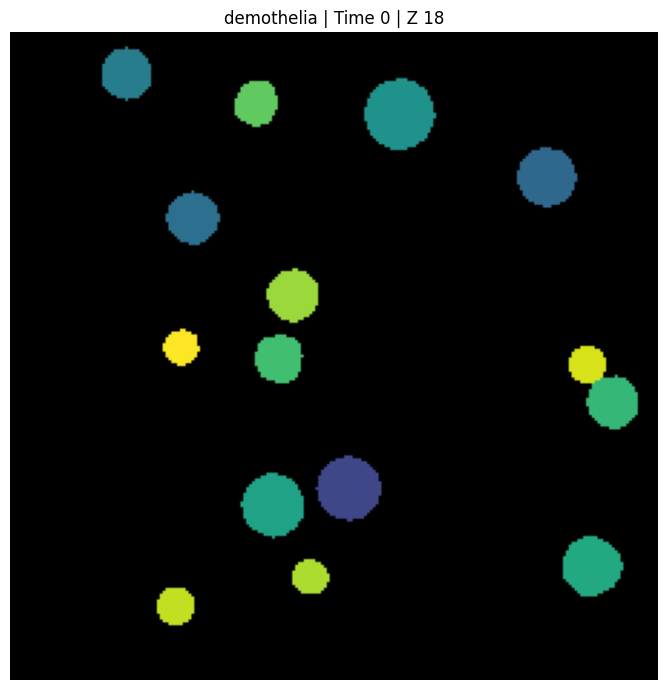

In [20]:
# === STEP 1: VISUALISE PRE-TRACKING ===
from visualisation import plot_volume_histogram_for_experiment, view_segmentation_slice_with_boundaries, get_segmented_tiffs_by_experiment

experiments = get_segmented_tiffs_by_experiment(OUTPUTS_DIR)

plot_volume_histogram_for_experiment(exp_index=0,
                                                   experiments_dict=experiments,
                                                   min_volume=MIN_VOLUME,
                                                   max_volume=MAX_VOLUME)

view_segmentation_slice_with_boundaries(exp_index=0,
                                        experiments_dict=experiments,
                                        time_index=0,
                                        z_slice=18,
                                        edge_margin=EDGE_MARGIN)



In [22]:
# === STEP 2: RUN TRACKING ===
tracking.run_tracking_pipeline(
    output_base_dir=OUTPUTS_DIR,
    xy_um=XY_UM,
    z_um=Z_UM,
    max_dist_um=MAX_DIST_UM,
    min_volume=MIN_VOLUME,
    max_volume=MAX_VOLUME,
    edge_margin=EDGE_MARGIN,
    tracking_mode=TRACKING_MODE
)

 Looking for segmented TIFFs in: /content/HyperThelia/Hyperthelia_project/outputs

 Checking: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Found 6 TIFF(s) in /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Timepoint log saved to: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/timepoint_log.txt

 Tracking 6 TIFF(s) for experiment: demothelia
 Saved tracking results to: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/tracked_objects.pkl
 demothelia: Tracked 119 total objects across 6 timepoints.


In [23]:
# === STEP 3: PROPAGATE LABELS ===
propagation.run_propagation_pipeline(output_base_dir=OUTPUTS_DIR)

 Looking for segmented TIFFs in: /content/HyperThelia/Hyperthelia_project/outputs

 Checking: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Found 6 TIFF(s) in /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Timepoint log saved to: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/timepoint_log.txt

 Propagating labels for experiment: demothelia
✅ Propagation complete.
→ Full masks:       /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/full_masks
→ Centroid masks:   /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/centroid_labels
→ Centroid CSV:     /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/centroids/centroids.csv


 Looking for segmented TIFFs in: /content/HyperThelia/Hyperthelia_project/outputs

 Checking: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Found 6 TIFF(s) in /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Timepoint log saved to: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/timepoint_log.txt
 Visualizing tracking for: demothelia


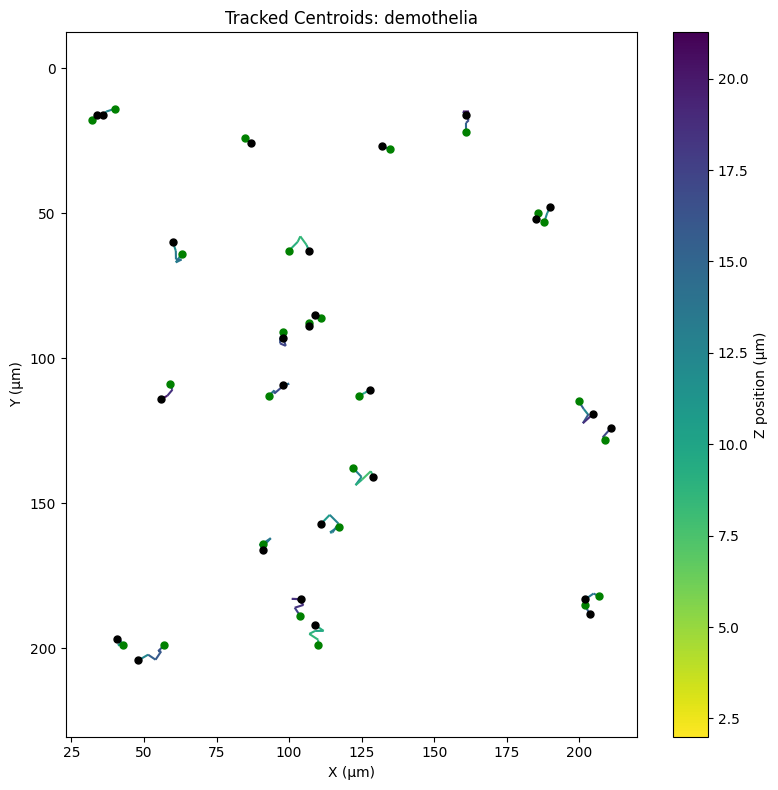

 Looking for segmented TIFFs in: /content/HyperThelia/Hyperthelia_project/outputs

 Checking: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Found 6 TIFF(s) in /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/raw_segmented_tiffs
 Timepoint log saved to: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/timepoint_log.txt


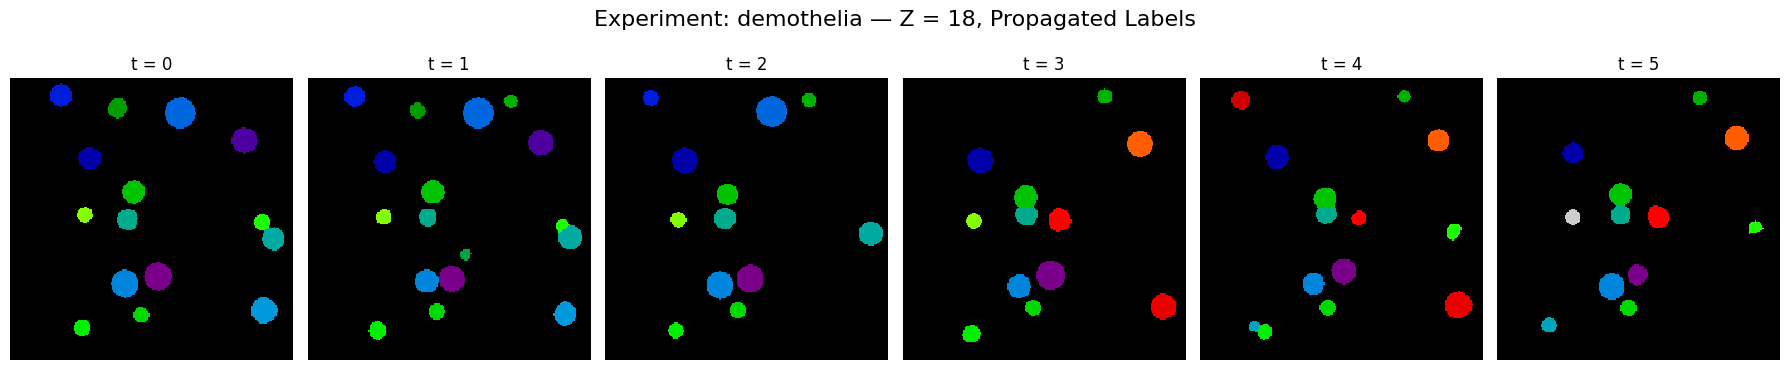

In [24]:
# === STEP 4: VISUALISE POST-TRACKING ===
visualisation.plot_tracked_centroids_xy_by_index(exp_index=0, output_base_dir=OUTPUTS_DIR)
visualisation.preview_propagated_labels_zslice(exp_index=0, z_slice=18, output_base_dir=OUTPUTS_DIR)

Part III: Measurement

In [25]:
import importlib
import measurement
import measurevisualise
importlib.reload(measurevisualise)
importlib.reload(measurement)

<module 'measurement' from '/content/HyperThelia/Hyperthelia_project/notebooks/lib/measurement.py'>

In [26]:
# ===  USER TOGGLES FOR MEASURES ===
is_tracked = True
compute_surface = True
enable_intensity_measurement = False
intensity_channel_mode = "folder"
force = False
RAW_INTENSITY_DIR = BASE_PROJECT_DIR / "raw_intensity"
EXPORT_DIR = BASE_PROJECT_DIR / "image_exports"


In [27]:
# ===  LIST AVAILABLE EXPERIMENTS ===
experiment_data = measurement.discover_experiments(OUTPUTS_DIR, is_tracked=is_tracked)
measurement.summarise_experiment_data(experiment_data)


 Summary of discovered experiments
 Total experiments: 1
🧮 Total TIFFs: 6



,experiment,n_tiffs
0,demothelia,6


In [28]:
# ===  MEASURE EXPERIMENTS ===
measurement.run_all_measurements(
    experiment_data=experiment_data,
    is_tracked=is_tracked,
    compute_surface=compute_surface,
    enable_intensity_measurement=enable_intensity_measurement,
    intensity_dir=RAW_INTENSITY_DIR,
    force=force
)



🧪 Measuring experiment: demothelia


   Timepoints for demothelia: 100%|██████████| 6/6 [00:07<00:00,  1.24s/it]

 Saved: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/measured/regionprops_demothelia_tracked.csv


In [29]:
# ===  LIST AVAILABLE MEASUREMENT CSVs ===
measurevisualise.list_available_measurement_csvs(BASE_PROJECT_DIR)



 Available measurement CSVs:
- outputs/outputs_demothelia/measured/regionprops_demothelia_tracked.csv


In [30]:
import pandas as pd

# Load the CSV and show all available measurement columns
csv_path = BASE_PROJECT_DIR / "outputs/outputs_demothelia/measured/regionprops_demothelia_tracked.csv"
df = pd.read_csv(csv_path)

print("Available measurement columns:")
print(df.columns.tolist())


Available measurement columns:
['experiment', 'label_id', 'timepoint', 'filename', 'source', 'is_tracked', 'area_voxels', 'centroid_z', 'centroid_y', 'centroid_x', 'bbox_zmin', 'bbox_ymin', 'bbox_xmin', 'bbox_zmax', 'bbox_ymax', 'bbox_xmax', 'major_axis_length', 'minor_axis_length', 'eigval1', 'eigval2', 'eigval3', 'elongation', 'aspect_ratio', 'surface_area', 'sphericity', 'valid_geometry']



 Viewing experiment: demothelia
   Timepoint: 0, Z-Slice: 19
   Value to color by: area_voxels
   Image path: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/tracking/full_masks/propagated_t000.tif
   CSV path: /content/HyperThelia/Hyperthelia_project/outputs/outputs_demothelia/measured/regionprops_demothelia_tracked.csv


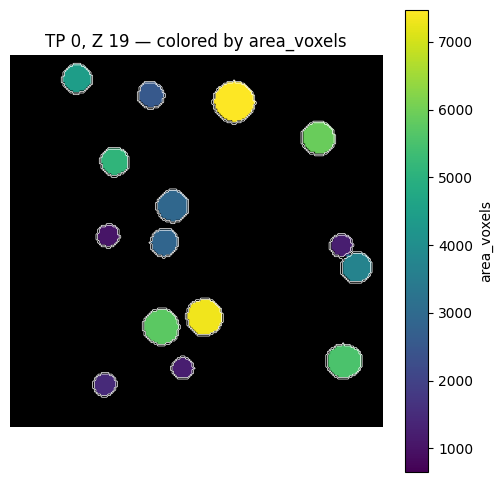

In [31]:

# ===  CHOOSE ONE MEASUREMENT CSV TO EXPLORE ===
csv_path = BASE_PROJECT_DIR / "outputs/outputs_demothelia/measured/regionprops_demothelia_tracked.csv"

# ===  VIEW A MEASUREMENT OVERLAY ===
timepoint = 0
z_slice = 19
value_column = "area_voxels"  # or e.g. "intensity_mean_C1", "elongation", etc.

measurevisualise.view_by_csv(
    csv_path=csv_path,
    base_dir=BASE_PROJECT_DIR,
    timepoint=timepoint,
    z=z_slice,
    value_column=value_column
)

In [32]:
# === Export TIFF ===
measurevisualise.export_measurement_values_as_tiff(csv_path,
                                  BASE_PROJECT_DIR,
                                  timepoint = timepoint,
                                  value_column = value_column,
                                  output_dir=BASE_PROJECT_DIR / "image_exports")




 Saved measurement TIFF: /content/HyperThelia/Hyperthelia_project/image_exports/demothelia_tp0_area_voxels.tif
